<a href="https://colab.research.google.com/github/sanjanamonteiro/TASK04/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


In [3]:
# 1. Choose a binary classification dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [4]:
# 2. Train/test split and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# 3. Fit a Logistic Regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC
y_pred = clf.predict(X_test_scaled)
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

In [7]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [8]:
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.97
Recall: 0.99
ROC-AUC: 1.00


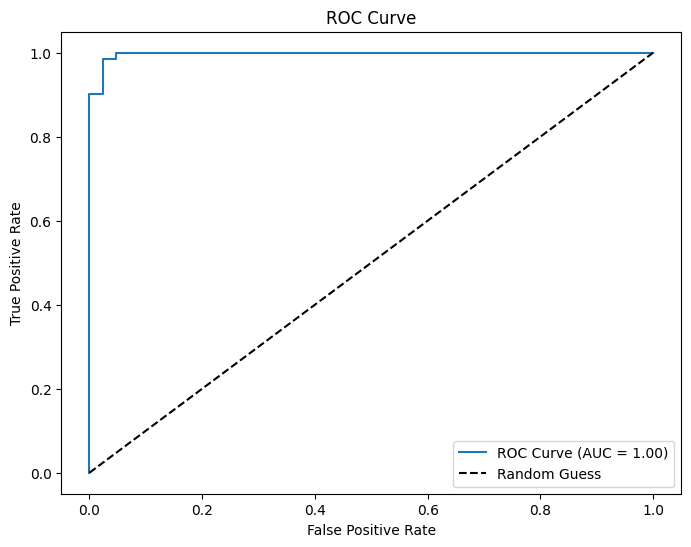

In [9]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [10]:
# 5. Tune threshold and explain sigmoid function
# Example: Change threshold from 0.5 to 0.3
threshold = 0.3
y_pred_custom = (y_pred_prob >= threshold).astype(int)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
print(f"\nWith threshold = {threshold}:")
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}")



With threshold = 0.3:
Precision: 0.97
Recall: 1.00


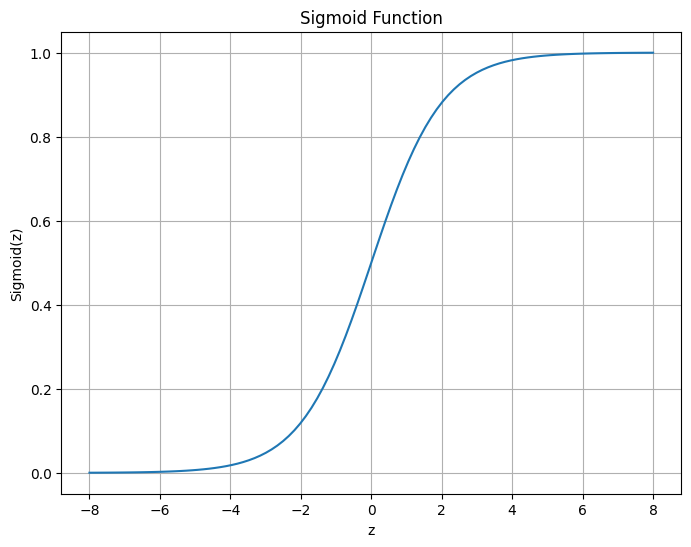


The sigmoid function, σ(z) = 1 / (1 + exp(-z)), maps any real-valued number into the (0,1) interval and is used in logistic regression to convert linear output to a probability.



In [11]:
# Sigmoid function visualization
z = np.linspace(-8, 8, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.figure(figsize=(8,6))
plt.plot(z, sigmoid)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

print("""
The sigmoid function, σ(z) = 1 / (1 + exp(-z)), maps any real-valued number into the (0,1) interval and is used in logistic regression to convert linear output to a probability.
""")